##### библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from IPython.core.pylabtools import figsize
import itertools
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

##### Загрузка выборки

In [34]:
df=pd.read_csv('input.csv')


##### Подготовка выборки

In [35]:
def preproc(df):
# загрузим данные
#будет установлена первая строка в качестве имен столбцов dataframe
    #преобразуем к числовому формату
    #df=df.iloc[0:108].apply(pd.to_numeric)
    x=df.iloc[:,0:15]
    y=df.iloc[:,-1]
    print(x)
    print(y)
    return df,x,y

In [36]:
def stat(df):
# описательная статистика для числовых данных
    print(df.describe())
    a=[]
    b=[]
    cols=list(df)
    for i in cols:
        kurt=sts.kurtosis(df[i], axis=0,fisher=True,bias=True)
        sk=sts.skew(df[i],axis=0, bias=True)
        print('Показатели ассиметрии и эксцесса для: {}'.format(i))
        print(kurt,sk)
        a.append(kurt)
        b.append(sk)
    return a,b

In [37]:
def hitg(df):
    fig=plt.figure(figsize=(15,20))
    ax=fig.gca()
    df.hist(ax=ax)
    #plt.title('Гистограммы показателей',fontsize=10)
    #plt.xlabel('Интервалы распределения',fontsize=10)
    #plt.ylabel('Частота',fontsize=10)
    plt.show()

    sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig=plt.gcf()
    fig.set_size_inches(12,12)
    plt.show()


In [38]:
def k_best(x,y):
    bestfeature=SelectKBest(score_func=chi2,k='all')
    fit=bestfeature.fit(x,y)
    df_score=pd.DataFrame(fit.scores_)
    df_column=pd.DataFrame(x.columns)
    feature_score=pd.concat([df_column,df_score],axis=1)
    feature_score.columns=['Specs', 'Score']
    feature_score=feature_score.sort_values(by='Score', ascending=False)
    print('Значимость показателей')
    print(feature_score)
# выбираем показатели по важности
    f_s1=feature_score[feature_score['Score']>20]
    drop_list1 = f_s1['Specs']
    #drop_list1.head(7)
#feature_score
    x_1=x.loc[:,drop_list1]#3
    print('Используя метод фльтрации Хи2 для отбра показателей мы получили следующий результат. Наиболее информативными показателями являются:')
    print(drop_list1)
    print('Создадим новую выборку состоящую толко из этих показателей.')
    print(x_1)
    return feature_score,x_1,f_s1

In [8]:
def forest_select(x,y):
    clf_rf_3 = RandomForestClassifier(criterion='entropy',max_depth=2, bootstrap= 'bool', random_state=1)
    clf_rf_2 = AdaBoostClassifier()
#mlp = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(3, ), random_state=1)
#mlp_full=mlp.fit(x_full_train, y_train)
    rfe = RFECV(estimator=clf_rf_3, step=1, cv=5)
    rfe1 = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
  # fff1=rfe.fit(x, y)
    ffff2=rfe1.fit(x, y)
# нужно проверить
    print(f'вектор. {rfe1.support_}')
    print('Ранжирование объектов с рекурсивным исключением с использование метода RandomForest::',x.columns[rfe1.support_])
    # формирование новой выборки
    x_12=x.loc[:,x.columns[rfe1.support_]]
    return x_12

In [39]:
def scal(x,y):
#шкалируем весь набор данных
    scaler = MinMaxScaler(feature_range=(0,1))
#назначение показателейдля шклирования
    x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
# обучающая и тестовая выборки по полным данным
# деление на обучающую и тестовую выборки: 80 % - 20 %
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.4, random_state=29)
    return x_train, x_test, y_train, y_test

##### оценка качества классификации

In [40]:
def accuracy_model(y_test, model_pred):
# доля правильных ответов алгоритма: Точность = (истинное положительное + истинно отрицательное значение) / всего
    acc = accuracy_score(y_test, model_pred)
    print(f"The accuracy score for method is: {round(acc,3)*100}%")

# Оценка f1: оценку F1 можно интерпретировать как средневзвешенное значение точности и запоминания, где оценка F1 достигает своего лучшего значения при 1 и худшего значения при 0.
    f1 = f1_score(y_test, model_pred)
    print(f"The f1 score for method is: {round(f1,3)*100}%")

# долю объектов, названных классификатором положительными и при этом действительно являющимися положительными: если прогноз «да», как часто он оказывается правильным? Точность = истинно положительный / предсказанный да
    precision = precision_score(y_test, model_pred)
    print(f"The precision score for method is: {round(precision,3)*100}%")

# показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм: истинно положительный показатель (чувствительность): когда на самом деле да, как часто он дает предсказание «да»? Истинно положительный процент = истинно положительный / фактический да
    recall = recall_score(y_test, model_pred)
    print(f"The recall score for method is: {round(recall,3)*100}%")

    # матрица неточности

    cnf_matrix = confusion_matrix(y_test, model_pred)

    fig, ax = plt.subplots()
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix \n', y=1.1)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="Reds" , fmt='g')

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    roc_auc = auc(fpr, tpr)
    figsize(5, 5)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return acc,f1,precision,recall,fpr

#### методы машинного обучения

In [57]:
def pred(vid, x_train, x_test,y_train):
    if vid == 'log':
        model = LogisticRegression().fit(x_train, y_train)
        pred = model.predict(x_test)
    elif vid == 'knn':
        knn = KNeighborsClassifier(n_neighbors = 2).fit(x_train, y_train)
        pred = knn.predict(x_test)
    elif vid == 'tree':
        dtc_up = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=0).fit(x_train, y_train)
        pred = dtc_up.predict(x_test)
    elif vid == 'svm':
        svm = SVC().fit(x_train, y_train)
        pred = svm.predict(x_test)
    elif vid == 'mlp':
        mlp = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(5, ), random_state=1).fit(x_train, y_train)
        pred = mlp.predict(x_test)
    elif vid == 'for':
        rfc = RandomForestClassifier(criterion='entropy',max_depth=2, random_state=1).fit(x_train, y_train)
        pred = rfc.predict(x_test)
    else:
        print("Такого метода нет")
    return pred

In [68]:
def ensamb(x_train, x_test,y_train):
    clf1 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=0)
    clf2 = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(3, ), random_state=1)
    clf3 = KNeighborsClassifier(n_neighbors = 2)
    clf4 = GaussianNB()
    clf5 = RandomForestClassifier(criterion='entropy',max_depth=2, random_state=1)

#eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf4)], voting='hard', weights=[6,3,2])
    eclf = VotingClassifier(estimators=[('fr', clf5), ('ml', clf2), ('kb', clf3)], voting='hard', weights=[6,3,2])
#eclf = VotingClassifier(estimators=[('dt', clf5), ('knn', clf1), ('svc', clf3)], voting='soft', weights=[3,1,1])
    ans_cls=eclf.fit(x_train, y_train)

    pred = ans_cls.predict(x_test)
    return pred

#### вызов функций

In [42]:
df,x,y=preproc(df)

     Hemoglobin  Erythrocytes  Color_index  Leukocytes   Neutrophils  \
0         146.0           4.5         0.97         7.6             9   
1         141.0           4.5         0.94         8.7             2   
2         162.0           4.8         1.00         8.1             6   
3         162.1           4.8         1.00         9.0            12   
4         142.8           4.6         0.93        12.5             6   
..          ...           ...          ...         ...           ...   
104       134.0           4.4         0.92         5.0             5   
105       148.6           4.6         0.97        11.4             6   
106       118.0           4.3         0.89         9.9             8   
107       142.8           4.6         0.93        10.3            26   
108       131.0           4.4         0.90         4.0             2   

      Neutrophils_segmented  Lymphocytes  Monocytes  Erythrocyte  \
0                        65           21          5           15   

In [43]:
kurt,sk=stat(df)

       Hemoglobin  Erythrocytes  Color_index  Leukocytes   Neutrophils  \
count  109.000000    109.000000   109.000000  109.000000    109.000000   
mean   137.774312      4.397248     0.934128    8.586239      8.733945   
std     18.073422      0.436412     0.042757    4.016412      7.527286   
min     69.000000      2.500000     0.820000    3.000000      1.000000   
25%    128.000000      4.300000     0.910000    5.400000      3.000000   
50%    140.000000      4.500000     0.930000    7.500000      6.000000   
75%    149.000000      4.600000     0.970000   10.300000     11.000000   
max    173.000000      5.100000     1.000000   20.500000     43.000000   

        Neutrophils_segmented  Lymphocytes   Monocytes  Erythrocyte  \
count              109.000000   109.000000  109.000000   109.000000   
mean                62.688073    23.908257    3.853211    21.568807   
std                  8.675954    10.469127    2.552507    13.912003   
min                 39.000000     2.000000    1.0

C:\Users\ellek\AppData\Local\Temp/ipykernel_11832/2619505570.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


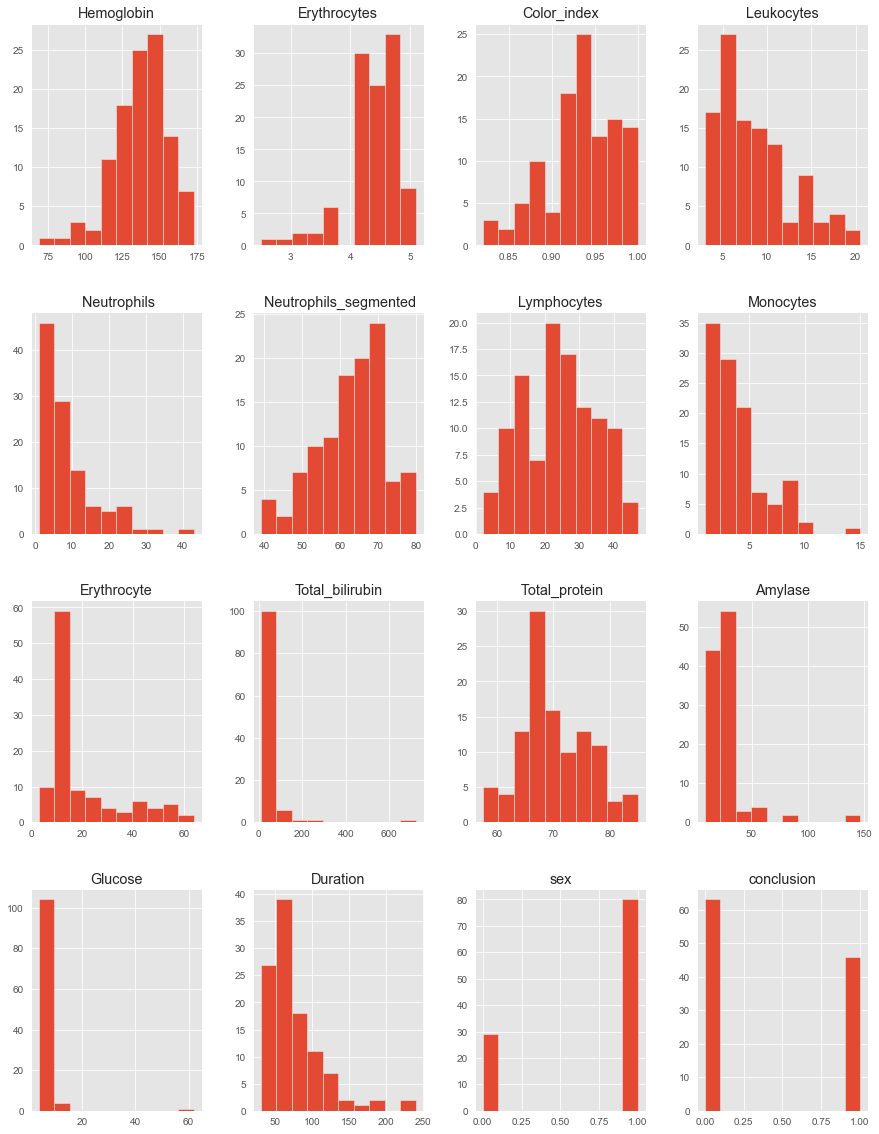

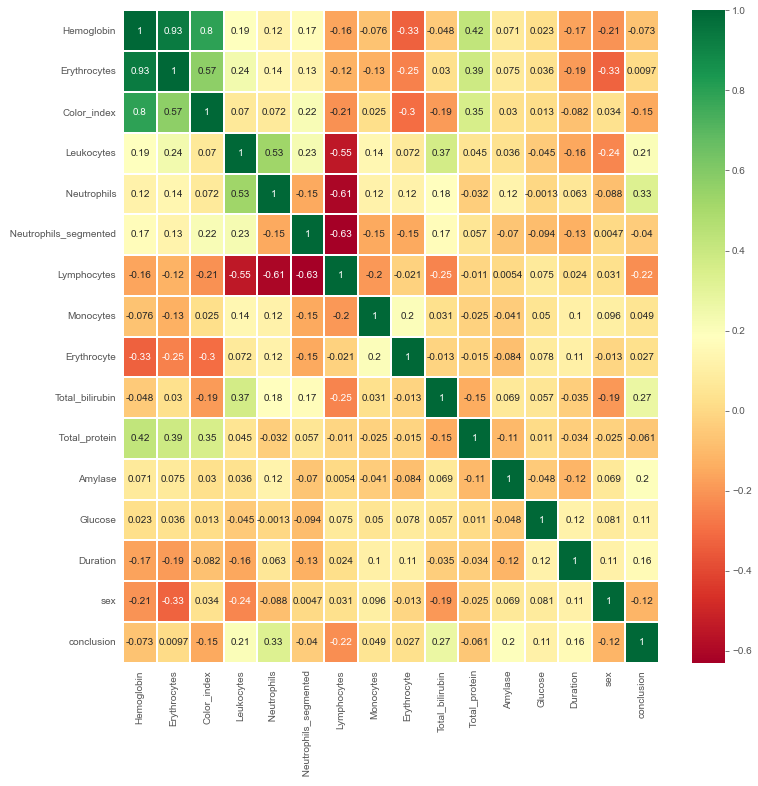

In [44]:
hitg(df)

In [45]:
feature_score,x_k,f_s1=k_best(x,y)

Значимость показателей
                     Specs        Score
9          Total_bilirubin  1326.885893
4              Neutrophils    76.449975
11                 Amylase    61.612598
13                Duration    50.868535
6              Lymphocytes    24.103487
3               Leukocytes     8.570744
12                 Glucose     6.403287
0               Hemoglobin     1.361429
8              Erythrocyte     0.686057
7                Monocytes     0.445049
14                     sex     0.390791
5    Neutrophils_segmented     0.208720
10           Total_protein     0.202523
2              Color_index     0.004930
1             Erythrocytes     0.000439
Используя метод фльтрации Хи2 для отбра показателей мы получили следующий результат. Наиболее информативными показателями являются:
9     Total_bilirubin
4         Neutrophils
11            Amylase
13           Duration
6         Lymphocytes
Name: Specs, dtype: object
Создадим новую выборку состоящую толко из этих показателей.
     Tot

### отбор показателей с помощью KBest график

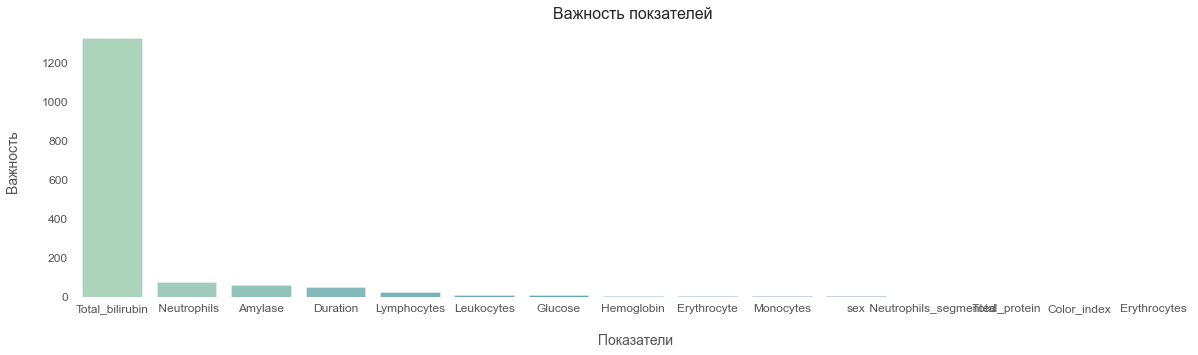

In [46]:
# визуалзация отбора показателей
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=feature_score, palette = "GnBu_d")
plt.box(False)
plt.title('Важность покзателей', fontsize=16)
plt.xlabel('\n Показатели', fontsize=14)
plt.ylabel('Важность \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Поскольку мы хотим опробовать разные модели, а также те, которые используют расстояние в качестве меры, мы будем масштабировать наши показатели.


## Разбиение выборки

In [47]:
# выбор разбиения полный набор или сокращенный
# полный набор
#x_train, x_test, y_train, y_test=scal(x,y)
#обучение на сокращенном наборе k-best
x_train, x_test, y_train, y_test=scal(x_k,y)

## Методы машинного обучения

### Логистическая регрессия

The accuracy score for method is: 63.6%
The f1 score for method is: 42.9%
The precision score for method is: 85.7%
The recall score for method is: 28.599999999999998%


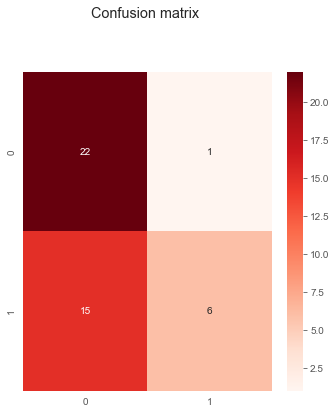

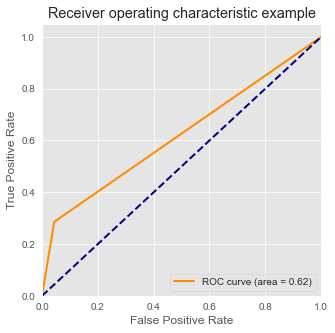

(0.6363636363636364,
 0.42857142857142855,
 0.8571428571428571,
 0.2857142857142857,
 array([0.        , 0.04347826, 1.        ]))

In [26]:
# полный набор
pred1=pred('log', x_train, x_test, y_train)
accuracy_model(y_test,pred1)

The accuracy score for method is: 54.50000000000001%
The f1 score for method is: 9.1%
The precision score for method is: 100.0%
The recall score for method is: 4.8%


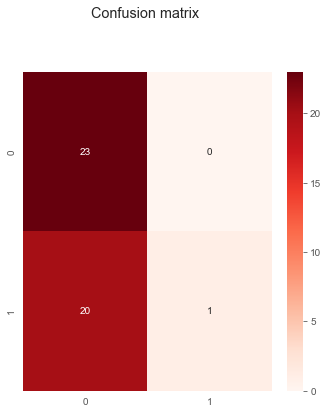

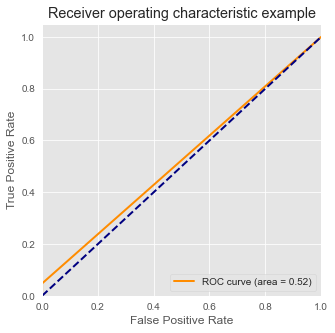

In [48]:
#обучение на сокращенном наборе k-best
pred1=pred('log', x_train, x_test, y_train)
acc1=accuracy_model(y_test,pred1)

Из представленного анализа видно, что максимальная точность метода логистическая регрессия составляет 54% на сокращенной выборке соданной, это говорит о том что данный метод не очень хорошо определяет классы. Для оценки качества классификатоа использовался ROC- анализ. Площадь под ROC кривой (AUC — Area Under ROC Curve) говорит о прогностической силе модели, причем AUC=1 соответствует идеальному классификатору. Для реальных классификаторов площадь под ROC-кривой больше 0,7–0,8, соответствует достаточно высокой точности классификации. В данном примере AUC=0,62 ,это говрит о том что данный алгорит не достаточно точен.

### К-ближайших соседей

The accuracy score for method is: 61.4%
The f1 score for method is: 37.0%
The precision score for method is: 83.3%
The recall score for method is: 23.799999999999997%


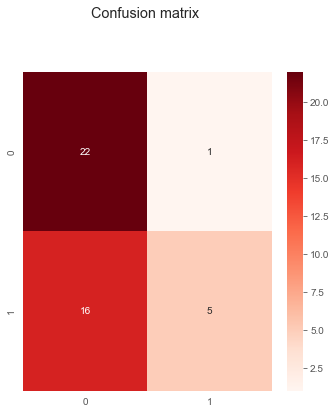

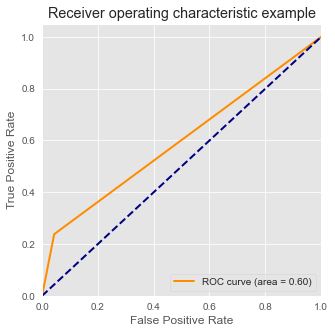

(0.6136363636363636,
 0.37037037037037035,
 0.8333333333333334,
 0.23809523809523808,
 array([0.        , 0.04347826, 1.        ]))

In [28]:
# полный набор
pred=pred('knn', x_train, x_test, y_train)
accuracy_model(y_test,pred)

The accuracy score for method is: 56.8%
The f1 score for method is: 29.599999999999998%
The precision score for method is: 66.7%
The recall score for method is: 19.0%


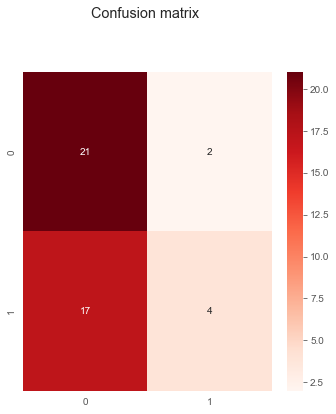

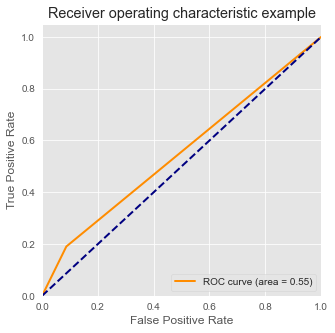

In [49]:
#обучение на сокращенном наборе k-best
pred2=pred('knn', x_train, x_test, y_train)
acc2=accuracy_model(y_test,pred2)

Из представленного анализа видно, что точность метода К-ближайших соседей составляет 56% на сокращенном наборе, это говорит о том что данный метод не очень хорошо определяет классы. Для оценки качества классификатоа использовался ROC- анализ. Площадь под ROC кривой (AUC — Area Under ROC Curve) говорит о прогностической силе модели, причем AUC=1 соответствует идеальному классификатору. Для реальных классификаторов площадь под ROC-кривой больше 0,7–0,8, соответствует достаточно высокой точности классификации. В данном примере AUC=0,6
 ,это говрит о том что данный алгорит не точен.

### Деревья решений

The accuracy score for method is: 65.9%
The f1 score for method is: 68.10000000000001%
The precision score for method is: 61.5%
The recall score for method is: 76.2%


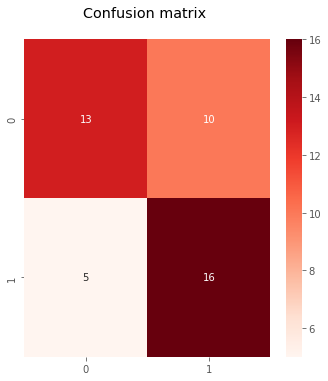

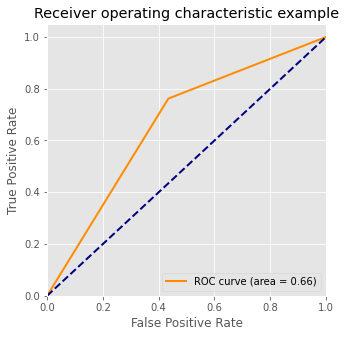

(0.6590909090909091,
 0.6808510638297872,
 0.6153846153846154,
 0.7619047619047619,
 array([0.        , 0.43478261, 1.        ]))

In [ ]:
# полный набор
pred=pred('tree', x_train, x_test, y_train)
accuracy_model(y_test,pred)

The accuracy score for method is: 52.300000000000004%
The f1 score for method is: 46.2%
The precision score for method is: 50.0%
The recall score for method is: 42.9%


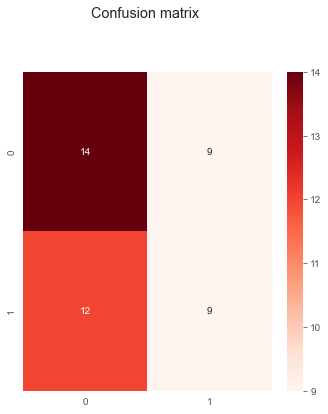

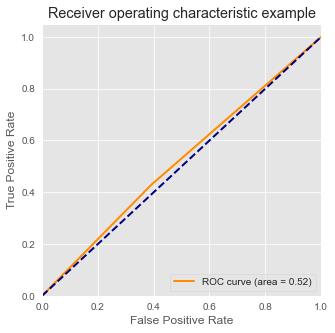

In [50]:
#обучение на сокращенном наборе k-best
pred3=pred('tree', x_train, x_test, y_train)
acc3=accuracy_model(y_test,pred3)

Из представленного анализа видно, что точность метода деревья решений составляет 52% на сокращенном наборе по методу k-best, это говорит о том что данный метод не достаточно хорошо определяет классы. Для оценки качества классификатоа использовался ROC- анализ. Площадь под ROC кривой (AUC — Area Under ROC Curve) говорит о прогностической силе модели, причем AUC=1 соответствует идеальному классификатору. Для реальных классификаторов площадь под ROC-кривой больше 0,7–0,8, соответствует достаточно высокой точности классификации. В данном примере AUC=0,74 ,это говрит о том что данный алгорит не достаточно точен.

### Метод опорных векторов

The accuracy score for method is: 63.6%
The f1 score for method is: 42.9%
The precision score for method is: 85.7%
The recall score for method is: 28.599999999999998%


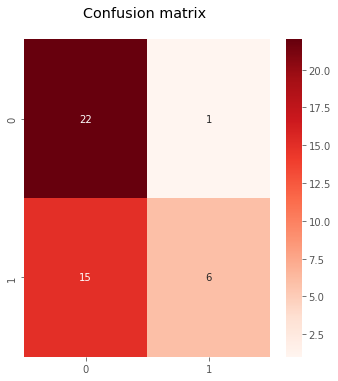

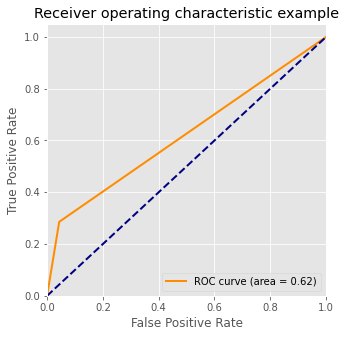

(0.6363636363636364,
 0.42857142857142855,
 0.8571428571428571,
 0.2857142857142857,
 array([0.        , 0.04347826, 1.        ]))

In [ ]:
# полный набор
pred=pred('svm', x_train, x_test, y_train)
accuracy_model(y_test,pred)

The accuracy score for method is: 61.4%
The f1 score for method is: 32.0%
The precision score for method is: 100.0%
The recall score for method is: 19.0%


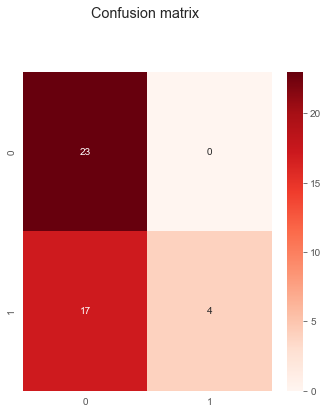

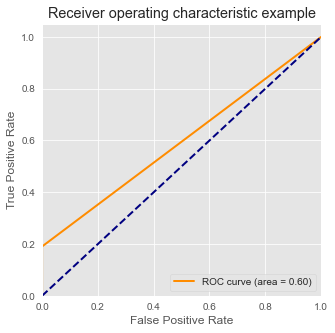

In [51]:
#обучение на сокращенном наборе k-best
pred4=pred('svm', x_train, x_test, y_train)
acc4=accuracy_model(y_test,pred4)

Из представленного анализа видно, что точность метода Опорных векторов составляет 61% на сокращенном наборе, это говорит о том что данный метод  не достаточно хорошо определяет классы. Для оценки качества классификатоа использовался ROC- анализ. Площадь под ROC кривой (AUC — Area Under ROC Curve) говорит о прогностической силе модели, причем AUC=1 соответствует идеальному классификатору. Для реальных классификаторов площадь под ROC-кривой больше 0,7–0,8, соответствует достаточно высокой точности классификации. В данном примере AUC=0,62 ,это говрит о том что данный алгорит не достаточно точен.

### Персептрон

The accuracy score for method is: 63.6%
The f1 score for method is: 38.5%
The precision score for method is: 100.0%
The recall score for method is: 23.799999999999997%


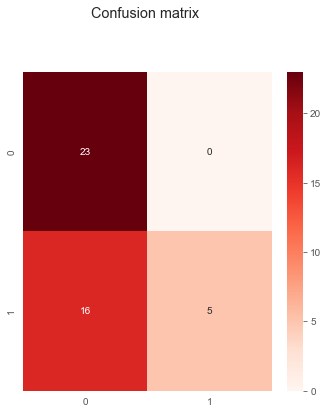

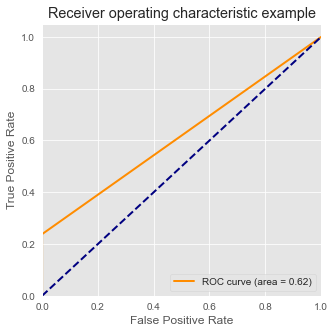

In [52]:
pn = Perceptron(max_iter=100, eta0=0.1, random_state=0)
#настройка
pn.fit(x_train, y_train)
pred5 = pn.predict(x_test)
acc5=accuracy_model(y_test,pred5)

Из представленного анализа видно, что точность метода Нейроная сеть(Персептрон) составляет 63%, это говорит о том что данный не очень хорошо определяет классы. Для оценки качества классификатоа использовался ROC- анализ. Площадь под ROC кривой (AUC — Area Under ROC Curve) говорит о прогностической силе модели, причем AUC=1 соответствует идеальному классификатору. Для реальных классификаторов площадь под ROC-кривой больше 0,7–0,8, соответствует достаточно высокой точности классификации. В данном примере AUC=0,53 ,это говрит о том что данный алгорит не точен.

### Многослойная сеть

The accuracy score for method is: 70.5%
The f1 score for method is: 62.9%
The precision score for method is: 78.60000000000001%
The recall score for method is: 52.400000000000006%


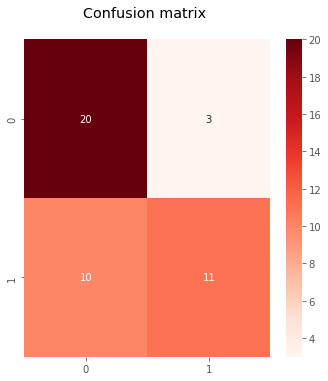

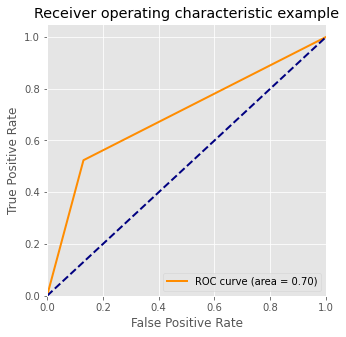

(0.7045454545454546,
 0.6285714285714286,
 0.7857142857142857,
 0.5238095238095238,
 array([0.        , 0.13043478, 1.        ]))

In [ ]:
# полный набор
pred=pred('mlp',x_train, x_test, y_train)
accuracy_model(y_test,pred)

The accuracy score for method is: 70.5%
The f1 score for method is: 58.099999999999994%
The precision score for method is: 90.0%
The recall score for method is: 42.9%


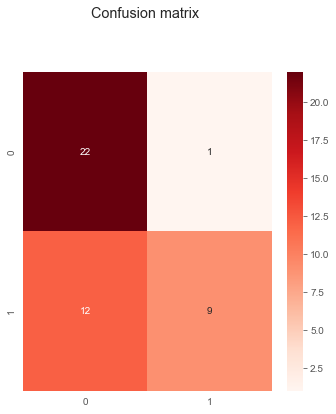

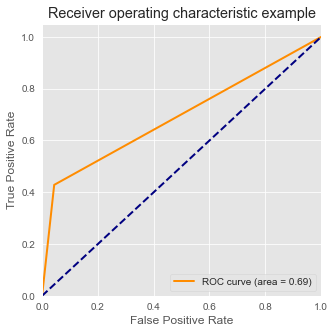

In [53]:
#обучение на сокращенном наборе k-best
pred6=pred('mlp',x_train, x_test, y_train)
acc6=accuracy_model(y_test,pred6)

Из представленного анализа видно, что точность метода Нейроная сеть(многослойный персептрон) с одним скрытым слоем и 5 нейронами в скрытом слое, функцией активации RelU, составляет 70%, это говорит о том что данный достаточно хорошо определяет классы. Для оценки качества классификатоа использовался ROC- анализ. Площадь под ROC кривой (AUC — Area Under ROC Curve) говорит о прогностической силе модели, причем AUC=1 соответствует идеальному классификатору. Для реальных классификаторов площадь под ROC-кривой больше 0,7–0,8, соответствует достаточно высокой точности классификации. В данном примере AUC=0,74 ,это говрит о том что данный алгорит достаточно точен.

На следующем этапе можно углубить анализ с применением различных деревьев решений.

### Случайный лес

The accuracy score for method is: 63.6%
The f1 score for method is: 42.9%
The precision score for method is: 85.7%
The recall score for method is: 28.599999999999998%


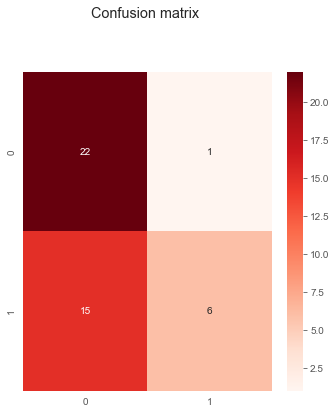

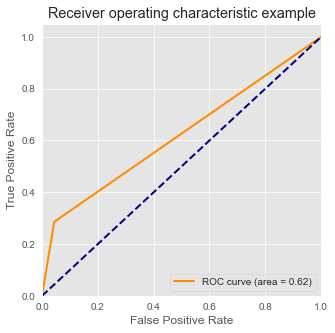

In [61]:
#обучение на сокращенном наборе k-best
pred7=pred('for', x_train, x_test, y_train)
acc6=accuracy_model(y_test,pred7)

Из представленного анализа видно, что точность метода случайный лес, составляет 63%, это говорит о том что данный не достаточно хорошо определяет классы. Для оценки качества классификатоа использовался ROC- анализ. Площадь под ROC кривой (AUC — Area Under ROC Curve) говорит о прогностической силе модели, причем AUC=1 соответствует идеальному классификатору. Для реальных классификаторов площадь под ROC-кривой больше 0,7–0,8, соответствует достаточно высокой точности классификации. В данном примере AUC=0,76 ,это говрит о том что данный алгорит достаточно точен.

### ИТОГО: общая точность по каждому классификатору

In [62]:
accrl = accuracy_score(y_test, pred1)
print(f"The accuracy score for LogReg is: {round(accrl,3)*100}%")
accrk = accuracy_score(y_test, pred2)
print(f"The accuracy score for KNN is: {round(accrk,3)*100}%")
accrd = accuracy_score(y_test, pred3)
print(f"The accuracy score for DTC is: {round(accrd,3)*100}%")
accrs = accuracy_score(y_test, pred4)
print(f"The accuracy score for SVM is: {round(accrs,3)*100}%")
accrp = accuracy_score(y_test, pred5)
print(f"The accuracy score for PPN is: {round(accrp,3)*100}%")
accrm = accuracy_score(y_test, pred6)
print(f"The accuracy score for MLP is: {round(accrm,3)*100}%")
accrf = accuracy_score(y_test, pred7)
print(f"The accuracy score for RandomForest is: {round(accrf,3)*100}%")

The accuracy score for LogReg is: 54.50000000000001%
The accuracy score for KNN is: 56.8%
The accuracy score for DTC is: 52.300000000000004%
The accuracy score for SVM is: 61.4%
The accuracy score for PPN is: 63.6%
The accuracy score for MLP is: 70.5%
The accuracy score for RandomForest is: 63.6%


Подводя итоги классификации различными методами можно сделать вывод наиболее точно определяет классы метод многослойная нейронная сеть с 5 нейронами в одном скрытом слое и функцией активации RelU.
На следующем этапе можно углубить анализ с применением различных деревьев решений.

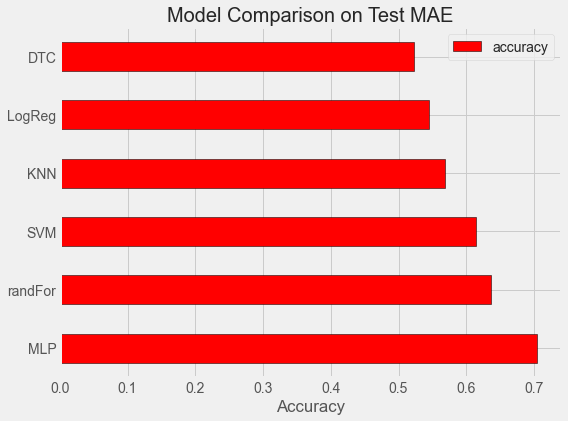

In [63]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['LogReg', 'KNN', 'DTC', 'SVM','MLP','randFor'],
                                 'accuracy': [accrl, accrk, accrd, accrs, accrm,accrf]})

# Horizontal bar chart of test mae
model_comparison.sort_values('accuracy', ascending = False).plot(x = 'model', y = 'accuracy', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Accuracy'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

#### Метод комбинирования оценок

The accuracy score for method is: 63.6%
The f1 score for method is: 42.9%
The precision score for method is: 85.7%
The recall score for method is: 28.599999999999998%


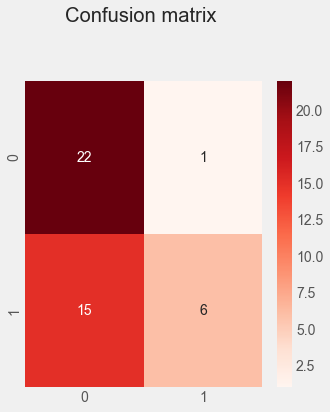

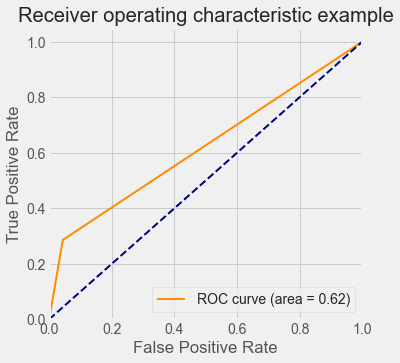

(0.6363636363636364,
 0.42857142857142855,
 0.8571428571428571,
 0.2857142857142857,
 array([0.        , 0.04347826, 1.        ]))

In [73]:
#обучение на сокращенном наборе k-best
pred8=ensamb(x_train, x_test, y_train)
accuracy_model(y_test,pred8)


Подводя итоги классификации различными методами можно сделать вывод наиболее точно определяет классы ансамблевый метод точность 77,3%. Для оценки качества классификатоа использовался ROC- анализ. Площадь под ROC кривой (AUC — Area Under ROC Curve) говорит о прогностической силе модели, причем AUC=1 соответствует идеальному классификатору. Для реальных классификаторов площадь под ROC-кривой больше 0,7–0,8, соответствует достаточно высокой точности классификации. В данном примере AUC=0,76 ,это говрит о том что данный алгорит достаточно точен.

### Вернёмся к гиперпараметрической настройке случайного леса

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time

#обучение на сокращенном наборе k-best
x_train, x_test, y_train, y_test=scal(x_k,y)

hp = {"max_depth": [4, 3, 2],
              "min_samples_split": sp_randint(2, 11),
              "criterion": ["gini", "entropy"],
              "bootstrap": [True, False]
              }

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

criterion= ["gini", "entropy"]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators':n_estimators,
                        'max_depth': max_depth,
                       'criterion':criterion,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

# Create the model to use for hyperparameter tuning
model = RandomForestClassifier(n_estimators=20)

n_iter_search = 10
#random_search = RandomizedSearchCV(model, param_distributions=hp, n_iter=n_iter_search, cv=5)

# Set up the random search with 4-fold cross validation
random_search = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=10,
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1,
                               return_train_score = True,
                               random_state=42)


# Fit on the training data
start = time()
best=random_search.fit(x_train, y_train)
print(random_search.best_estimator_)
best_pred = best.predict(x_test)

# check accuracy:
acc = accuracy_score(y_test, best_pred)
print(f"The accuracy score for gbf is: {round(acc,3)*100}%")

# Create the model to use for hyperparameter tuning
model_best = RandomForestClassifier(random_search.best_estimator_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=2,
                       min_samples_split=6)
The accuracy score for gbf is: 59.099999999999994%


In [75]:
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

RandomizedSearchCV took 19.09 seconds for 10 candidates parameter settings.
-0.262 (+/-0.138) for {'n_estimators': 1500, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy'}
-0.278 (+/-0.144) for {'n_estimators': 900, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
-0.277 (+/-0.055) for {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
-0.292 (+/-0.102) for {'n_estimators': 1500, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
-0.231 (+/-0.135) for {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'gini'}
-0.278 (+/-0.071) for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}
-0.292 